#Primer Modelo - Clasificacion Binaria

##Nombre: Jhamil Crespo Rejas
##Carrera: Ingenieria en Ciencias de la Computacion

##Importacion de Librerias

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [33]:
# utilizado para manejos de directorios y rutas
import os
#utilizado para importar y ordenar los datos del DATASET
import pandas as pd
# Computacion vectorial y cientifica para python
import numpy as np

# Modulo de optimizacion en scipy
from scipy import optimize

from sklearn.model_selection import train_test_split

# Librerias para graficar
from matplotlib import pyplot

# le dice a matplotlib que incruste gráficos en el cuaderno
%matplotlib inline

##Analisis del Dataset

Este dataset contiene registros relevantes para una campaña de marketing directo de una institución bancaria portuguesa. La campaña de marketing se ejecutó a través de llamadas telefónicas. El objetivo de la clasificación es predecir si el cliente suscribirá (sí/no) el depósito a plazo (variable y).

Extraemos el dataset y lo almacenamos en un dataframe con ayuda de pandas

In [3]:
dataframe = pd.read_csv('/content/drive/MyDrive/Primer Parcial - IA/Datasets/bank-direct-marketing-campaigns.csv')
print(dataframe.sample(n=200))

       age          job   marital          education  default housing loan  \
31576   39     services   married        high.school       no     yes   no   
9284    43       admin.   married        high.school       no     yes   no   
23535   40       admin.   married  university.degree       no      no   no   
34432   46     services   married        high.school       no      no   no   
5571    44   management  divorced           basic.9y  unknown      no   no   
...    ...          ...       ...                ...      ...     ...  ...   
32591   33  blue-collar   married           basic.9y       no     yes   no   
7871    51  blue-collar   married           basic.9y       no     yes   no   
16407   56  blue-collar   married           basic.9y       no     yes   no   
12650   33       admin.   married  university.degree       no     yes   no   
23979   33       admin.   married  university.degree       no      no   no   

         contact month day_of_week  campaign  pdays  previous  

###Cambio de texto a numeros

Varias de las caracteristicas de este dataset contienen datos categoricos, y para entrenar al modelo necesitamos convertir estos datos a una equivalencia numerica

####job

In [4]:
trabajos_unicos = dataframe['job'].unique() #Obtenemos todos los valores unicos de la columna 'job'

#Mostramos la lista de trabajos unicos y la cantidad de estos
print(trabajos_unicos)
print(len(trabajos_unicos))

['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
12


In [5]:
#Se asigna valores numericos a cada uno de los trabajos
job_ordinal_map = {
    'housemaid': 1,
    'services': 2,
    'admin.': 3,
    'blue-collar': 4,
    'technician': 5,
    'retired': 6,
    'management': 7,
    'unemployed': 8,
    'self-employed': 9,
    'unknown': 10,
    'entrepreneur': 11,
    'student': 12
}

# Se aplica el mapeo a la columna 'job' y se crea una nueva columna 'job_ordinal' con los valores numericos respectivos
dataframe['job_ordinal'] = dataframe['job'].map(job_ordinal_map)

#Quitamos la columna 'job'
dataframe.drop('job', axis=1, inplace=True)

#verificamos
print(dataframe.head())

   age  marital    education  default housing loan    contact month  \
0   56  married     basic.4y       no      no   no  telephone   may   
1   57  married  high.school  unknown      no   no  telephone   may   
2   37  married  high.school       no     yes   no  telephone   may   
3   40  married     basic.6y       no      no   no  telephone   may   
4   56  married  high.school       no      no  yes  telephone   may   

  day_of_week  campaign  pdays  previous     poutcome  emp.var.rate  \
0         mon         1    999         0  nonexistent           1.1   
1         mon         1    999         0  nonexistent           1.1   
2         mon         1    999         0  nonexistent           1.1   
3         mon         1    999         0  nonexistent           1.1   
4         mon         1    999         0  nonexistent           1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  job_ordinal  
0          93.994          -36.4      4.857       5191.0  no          

####marital

In [6]:
marital_unicos = dataframe['marital'].unique() #Obtenemos todos los valores unicos de la columna 'marital'

#Mostramos la lista de valores unicos y la cantidad de estos
print(marital_unicos)
print(len(marital_unicos))

['married' 'single' 'divorced' 'unknown']
4


In [7]:
#Se asigna valores numericos a cada uno de los valores unicos
marital_ordinal_map = {
    'married': 1,
    'single': 2,
    'divorced': 3,
    'unknown': 4
}

# Se aplica el mapeo a la columna 'marital' y se crea una nueva columna 'marital_ordinal' con los valores numericos respectivos
dataframe['marital_ordinal'] = dataframe['marital'].map(marital_ordinal_map)

#Quitamos la columna 'marital'
dataframe.drop('marital', axis=1, inplace=True)

#verificamos
print(dataframe.head())

   age    education  default housing loan    contact month day_of_week  \
0   56     basic.4y       no      no   no  telephone   may         mon   
1   57  high.school  unknown      no   no  telephone   may         mon   
2   37  high.school       no     yes   no  telephone   may         mon   
3   40     basic.6y       no      no   no  telephone   may         mon   
4   56  high.school       no      no  yes  telephone   may         mon   

   campaign  pdays  previous     poutcome  emp.var.rate  cons.price.idx  \
0         1    999         0  nonexistent           1.1          93.994   
1         1    999         0  nonexistent           1.1          93.994   
2         1    999         0  nonexistent           1.1          93.994   
3         1    999         0  nonexistent           1.1          93.994   
4         1    999         0  nonexistent           1.1          93.994   

   cons.conf.idx  euribor3m  nr.employed   y  job_ordinal  marital_ordinal  
0          -36.4      4.857

####education

In [8]:
education_unicos = dataframe['education'].unique() #Obtenemos todos los valores unicos de la columna 'education'

#Mostramos la lista de valores unicos y la cantidad de estos
print(education_unicos)
print(len(education_unicos))

['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
8


In [9]:
#Se asigna valores numericos a cada uno de los valores unicos
education_ordinal_map = {
    'basic.4y': 1,
    'high.school': 2,
    'basic.6y': 3,
    'basic.9y': 4,
    'professional.course': 5,
    'unknown': 6,
    'university.degree': 7,
    'illiterate': 8
}

# Se aplica el mapeo a la columna 'education' y se crea una nueva columna 'education_ordinal' con los valores numericos respectivos
dataframe['education_ordinal'] = dataframe['education'].map(education_ordinal_map)

#Quitamos la columna 'education'
dataframe.drop('education', axis=1, inplace=True)

#verificamos
print(dataframe.head())

   age  default housing loan    contact month day_of_week  campaign  pdays  \
0   56       no      no   no  telephone   may         mon         1    999   
1   57  unknown      no   no  telephone   may         mon         1    999   
2   37       no     yes   no  telephone   may         mon         1    999   
3   40       no      no   no  telephone   may         mon         1    999   
4   56       no      no  yes  telephone   may         mon         1    999   

   previous     poutcome  emp.var.rate  cons.price.idx  cons.conf.idx  \
0         0  nonexistent           1.1          93.994          -36.4   
1         0  nonexistent           1.1          93.994          -36.4   
2         0  nonexistent           1.1          93.994          -36.4   
3         0  nonexistent           1.1          93.994          -36.4   
4         0  nonexistent           1.1          93.994          -36.4   

   euribor3m  nr.employed   y  job_ordinal  marital_ordinal  education_ordinal  
0      4.85

####default

In [10]:
default_unicos = dataframe['default'].unique() #Obtenemos todos los valores unicos de la columna 'default'

#Mostramos la lista de valores unicos y la cantidad de estos
print(default_unicos)
print(len(default_unicos))

['no' 'unknown' 'yes']
3


In [11]:
#Se asigna valores numericos a cada uno de los valores unicos
default_ordinal_map = {
    'no': 1,
    'unknown': 2,
    'yes': 3
}

# Se aplica el mapeo a la columna 'default' y se crea una nueva columna 'default_ordinal' con los valores numericos respectivos
dataframe['default_ordinal'] = dataframe['default'].map(default_ordinal_map)

#Quitamos la columna 'default'
dataframe.drop('default', axis=1, inplace=True)

#verificamos
print(dataframe.head())

   age housing loan    contact month day_of_week  campaign  pdays  previous  \
0   56      no   no  telephone   may         mon         1    999         0   
1   57      no   no  telephone   may         mon         1    999         0   
2   37     yes   no  telephone   may         mon         1    999         0   
3   40      no   no  telephone   may         mon         1    999         0   
4   56      no  yes  telephone   may         mon         1    999         0   

      poutcome  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
0  nonexistent           1.1          93.994          -36.4      4.857   
1  nonexistent           1.1          93.994          -36.4      4.857   
2  nonexistent           1.1          93.994          -36.4      4.857   
3  nonexistent           1.1          93.994          -36.4      4.857   
4  nonexistent           1.1          93.994          -36.4      4.857   

   nr.employed   y  job_ordinal  marital_ordinal  education_ordinal  \
0       5

####housing

In [12]:
housing_unicos = dataframe['housing'].unique() #Obtenemos todos los valores unicos de la columna 'housing'

#Mostramos la lista de valores unicos y la cantidad de estos
print(housing_unicos)
print(len(housing_unicos))

['no' 'yes' 'unknown']
3


In [13]:
#Se asigna valores numericos a cada uno de los valores unicos
housing_ordinal_map = {
    'no': 1,
    'unknown': 2,
    'yes': 3
}

# Se aplica el mapeo a la columna 'housing' y se crea una nueva columna 'housing_ordinal' con los valores numericos respectivos
dataframe['housing_ordinal'] = dataframe['housing'].map(housing_ordinal_map)

#Quitamos la columna 'housing'
dataframe.drop('housing', axis=1, inplace=True)

#verificamos
print(dataframe.head())

   age loan    contact month day_of_week  campaign  pdays  previous  \
0   56   no  telephone   may         mon         1    999         0   
1   57   no  telephone   may         mon         1    999         0   
2   37   no  telephone   may         mon         1    999         0   
3   40   no  telephone   may         mon         1    999         0   
4   56  yes  telephone   may         mon         1    999         0   

      poutcome  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
0  nonexistent           1.1          93.994          -36.4      4.857   
1  nonexistent           1.1          93.994          -36.4      4.857   
2  nonexistent           1.1          93.994          -36.4      4.857   
3  nonexistent           1.1          93.994          -36.4      4.857   
4  nonexistent           1.1          93.994          -36.4      4.857   

   nr.employed   y  job_ordinal  marital_ordinal  education_ordinal  \
0       5191.0  no            1                1         

####loan

In [14]:
loan_unicos = dataframe['loan'].unique() #Obtenemos todos los valores unicos de la columna 'loan'

#Mostramos la lista de valores unicos y la cantidad de estos
print(loan_unicos)
print(len(loan_unicos))

['no' 'yes' 'unknown']
3


In [15]:
#Se asigna valores numericos a cada uno de los valores unicos
loan_ordinal_map = {
    'no': 1,
    'unknown': 2,
    'yes': 3
}

# Se aplica el mapeo a la columna 'loan' y se crea una nueva columna 'loan_ordinal' con los valores numericos respectivos
dataframe['loan_ordinal'] = dataframe['loan'].map(loan_ordinal_map)

#Quitamos la columna 'loan'
dataframe.drop('loan', axis=1, inplace=True)

#verificamos
print(dataframe.head())

   age    contact month day_of_week  campaign  pdays  previous     poutcome  \
0   56  telephone   may         mon         1    999         0  nonexistent   
1   57  telephone   may         mon         1    999         0  nonexistent   
2   37  telephone   may         mon         1    999         0  nonexistent   
3   40  telephone   may         mon         1    999         0  nonexistent   
4   56  telephone   may         mon         1    999         0  nonexistent   

   emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  \
0           1.1          93.994          -36.4      4.857       5191.0  no   
1           1.1          93.994          -36.4      4.857       5191.0  no   
2           1.1          93.994          -36.4      4.857       5191.0  no   
3           1.1          93.994          -36.4      4.857       5191.0  no   
4           1.1          93.994          -36.4      4.857       5191.0  no   

   job_ordinal  marital_ordinal  education_ordinal  defa

####contact

In [16]:
contact_unicos = dataframe['contact'].unique() #Obtenemos todos los valores unicos de la columna 'contact'

#Mostramos la lista de valores unicos y la cantidad de estos
print(contact_unicos)
print(len(contact_unicos))

['telephone' 'cellular']
2


In [17]:
#Se asigna valores numericos a cada uno de los valores unicos
contact_ordinal_map = {
    'telephone': 1,
    'cellular': 2
}

# Se aplica el mapeo a la columna 'contact' y se crea una nueva columna 'contact_ordinal' con los valores numericos respectivos
dataframe['contact_ordinal'] = dataframe['contact'].map(contact_ordinal_map)

#Quitamos la columna 'contact'
dataframe.drop('contact', axis=1, inplace=True)

#verificamos
print(dataframe.head())

   age month day_of_week  campaign  pdays  previous     poutcome  \
0   56   may         mon         1    999         0  nonexistent   
1   57   may         mon         1    999         0  nonexistent   
2   37   may         mon         1    999         0  nonexistent   
3   40   may         mon         1    999         0  nonexistent   
4   56   may         mon         1    999         0  nonexistent   

   emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  \
0           1.1          93.994          -36.4      4.857       5191.0  no   
1           1.1          93.994          -36.4      4.857       5191.0  no   
2           1.1          93.994          -36.4      4.857       5191.0  no   
3           1.1          93.994          -36.4      4.857       5191.0  no   
4           1.1          93.994          -36.4      4.857       5191.0  no   

   job_ordinal  marital_ordinal  education_ordinal  default_ordinal  \
0            1                1                  1 

####month

In [18]:
month_unicos = dataframe['month'].unique() #Obtenemos todos los valores unicos de la columna 'month'

#Mostramos la lista de valores unicos y la cantidad de estos
print(month_unicos)
print(len(month_unicos))

['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
10


In [19]:
#Se asigna valores numericos a cada uno de los valores unicos
month_ordinal_map = {
    'may': 1,
    'jun': 2,
    'jul': 3,
    'aug': 4,
    'oct': 5,
    'nov': 6,
    'dec': 7,
    'mar': 8,
    'apr': 9,
    'sep': 10
}

# Se aplica el mapeo a la columna 'month' y se crea una nueva columna 'month_ordinal' con los valores numericos respectivos
dataframe['month_ordinal'] = dataframe['month'].map(month_ordinal_map)

#Quitamos la columna 'month'
dataframe.drop('month', axis=1, inplace=True)

#verificamos
print(dataframe.head())

   age day_of_week  campaign  pdays  previous     poutcome  emp.var.rate  \
0   56         mon         1    999         0  nonexistent           1.1   
1   57         mon         1    999         0  nonexistent           1.1   
2   37         mon         1    999         0  nonexistent           1.1   
3   40         mon         1    999         0  nonexistent           1.1   
4   56         mon         1    999         0  nonexistent           1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  job_ordinal  \
0          93.994          -36.4      4.857       5191.0  no            1   
1          93.994          -36.4      4.857       5191.0  no            2   
2          93.994          -36.4      4.857       5191.0  no            2   
3          93.994          -36.4      4.857       5191.0  no            3   
4          93.994          -36.4      4.857       5191.0  no            2   

   marital_ordinal  education_ordinal  default_ordinal  housing_ordinal  \
0    

####day_of_week

In [20]:
day_of_week_unicos = dataframe['day_of_week'].unique() #Obtenemos todos los valores unicos de la columna 'day_of_week'

#Mostramos la lista de valores unicos y la cantidad de estos
print(day_of_week_unicos)
print(len(day_of_week_unicos))

['mon' 'tue' 'wed' 'thu' 'fri']
5


In [21]:
#Se asigna valores numericos a cada uno de los valores unicos
day_of_week_ordinal_map = {
    'mon': 1,
    'tue': 2,
    'wed': 3,
    'thu': 4,
    'fri': 5
}

# Se aplica el mapeo a la columna 'day_of_week' y se crea una nueva columna 'day_of_week_ordinal' con los valores numericos respectivos
dataframe['day_of_week_ordinal'] = dataframe['day_of_week'].map(day_of_week_ordinal_map)

#Quitamos la columna 'day_of_week'
dataframe.drop('day_of_week', axis=1, inplace=True)

#verificamos
print(dataframe.head())

   age  campaign  pdays  previous     poutcome  emp.var.rate  cons.price.idx  \
0   56         1    999         0  nonexistent           1.1          93.994   
1   57         1    999         0  nonexistent           1.1          93.994   
2   37         1    999         0  nonexistent           1.1          93.994   
3   40         1    999         0  nonexistent           1.1          93.994   
4   56         1    999         0  nonexistent           1.1          93.994   

   cons.conf.idx  euribor3m  nr.employed   y  job_ordinal  marital_ordinal  \
0          -36.4      4.857       5191.0  no            1                1   
1          -36.4      4.857       5191.0  no            2                1   
2          -36.4      4.857       5191.0  no            2                1   
3          -36.4      4.857       5191.0  no            3                1   
4          -36.4      4.857       5191.0  no            2                1   

   education_ordinal  default_ordinal  housing_ord

####poutcome

In [22]:
poutcome_unicos = dataframe['poutcome'].unique() #Obtenemos todos los valores unicos de la columna 'poutcome'

#Mostramos la lista de valores unicos y la cantidad de estos
print(poutcome_unicos)
print(len(poutcome_unicos))

['nonexistent' 'failure' 'success']
3


In [23]:
#Se asigna valores numericos a cada uno de los valores unicos
poutcome_ordinal_map = {
    'nonexistent': 1,
    'failure': 2,
    'success': 3
}

# Se aplica el mapeo a la columna 'poutcome' y se crea una nueva columna 'poutcome_ordinal' con los valores numericos respectivos
dataframe['poutcome_ordinal'] = dataframe['poutcome'].map(poutcome_ordinal_map)

#Quitamos la columna 'poutcome'
dataframe.drop('poutcome', axis=1, inplace=True)

#verificamos
print(dataframe.head())

   age  campaign  pdays  previous  emp.var.rate  cons.price.idx  \
0   56         1    999         0           1.1          93.994   
1   57         1    999         0           1.1          93.994   
2   37         1    999         0           1.1          93.994   
3   40         1    999         0           1.1          93.994   
4   56         1    999         0           1.1          93.994   

   cons.conf.idx  euribor3m  nr.employed   y  job_ordinal  marital_ordinal  \
0          -36.4      4.857       5191.0  no            1                1   
1          -36.4      4.857       5191.0  no            2                1   
2          -36.4      4.857       5191.0  no            2                1   
3          -36.4      4.857       5191.0  no            3                1   
4          -36.4      4.857       5191.0  no            2                1   

   education_ordinal  default_ordinal  housing_ordinal  loan_ordinal  \
0                  1                1                1  

####y

In [24]:
y_unicos = dataframe['y'].unique() #Obtenemos todos los valores unicos de la columna 'y'

#Mostramos la lista de valores unicos y la cantidad de estos
print(y_unicos)
print(len(y_unicos))

['no' 'yes']
2


In [25]:
#Se asigna valores numericos a cada uno de los valores unicos
y_ordinal_map = {
    'no': 1,
    'yes': 2
}

# Se aplica el mapeo a la columna 'y' y se crea una nueva columna 'y_ordinal' con los valores numericos respectivos
dataframe['y_ordinal'] = dataframe['y'].map(y_ordinal_map)

#Quitamos la columna 'y'
dataframe.drop('y', axis=1, inplace=True)

#verificamos
print(dataframe.head())

   age  campaign  pdays  previous  emp.var.rate  cons.price.idx  \
0   56         1    999         0           1.1          93.994   
1   57         1    999         0           1.1          93.994   
2   37         1    999         0           1.1          93.994   
3   40         1    999         0           1.1          93.994   
4   56         1    999         0           1.1          93.994   

   cons.conf.idx  euribor3m  nr.employed  job_ordinal  marital_ordinal  \
0          -36.4      4.857       5191.0            1                1   
1          -36.4      4.857       5191.0            2                1   
2          -36.4      4.857       5191.0            2                1   
3          -36.4      4.857       5191.0            3                1   
4          -36.4      4.857       5191.0            2                1   

   education_ordinal  default_ordinal  housing_ordinal  loan_ordinal  \
0                  1                1                1             1   
1       

###Correlacion

La correlación es una medida estadística que indica el grado de relación entre las variables. Necesitamos identificar:

*   Variables independientes con una correlacion muy fuerte entre si
*   Variables independientes con una correlacion muy debil con la variable dependiente

Estos deben ser eliminados ya que pueden afectar negativamente al entrenamiento del modelo


In [26]:
correlation_matrix = dataframe.corr()

# Imprime la matriz de correlación
print(correlation_matrix)

                          age  campaign     pdays  previous  emp.var.rate  \
age                  1.000000  0.004594 -0.034369  0.024365     -0.000371   
campaign             0.004594  1.000000  0.052584 -0.079141      0.150754   
pdays               -0.034369  0.052584  1.000000 -0.587514      0.271004   
previous             0.024365 -0.079141 -0.587514  1.000000     -0.420489   
emp.var.rate        -0.000371  0.150754  0.271004 -0.420489      1.000000   
cons.price.idx       0.000857  0.127836  0.078889 -0.203130      0.775334   
cons.conf.idx        0.129372 -0.013733 -0.091342 -0.050936      0.196041   
euribor3m            0.010767  0.135133  0.296899 -0.454494      0.972245   
nr.employed         -0.017725  0.144095  0.372605 -0.501333      0.906970   
job_ordinal          0.030413 -0.017085 -0.051677  0.051348     -0.083007   
marital_ordinal     -0.114983  0.002269 -0.017635  0.030222     -0.048931   
education_ordinal   -0.091900 -0.001521 -0.034772  0.022826     -0.033385   

In [27]:
#Eliminamos las caracyeristicas que presentan una correlacion muy cercana a cero en relacion con nuestra variable dependiente 'job_ordinal'
dataframe.drop('loan_ordinal', axis=1, inplace=True)

In [28]:
correlation_matrix2 = dataframe.corr()

# Imprime la matriz de correlación
print(correlation_matrix2)

                          age  campaign     pdays  previous  emp.var.rate  \
age                  1.000000  0.004594 -0.034369  0.024365     -0.000371   
campaign             0.004594  1.000000  0.052584 -0.079141      0.150754   
pdays               -0.034369  0.052584  1.000000 -0.587514      0.271004   
previous             0.024365 -0.079141 -0.587514  1.000000     -0.420489   
emp.var.rate        -0.000371  0.150754  0.271004 -0.420489      1.000000   
cons.price.idx       0.000857  0.127836  0.078889 -0.203130      0.775334   
cons.conf.idx        0.129372 -0.013733 -0.091342 -0.050936      0.196041   
euribor3m            0.010767  0.135133  0.296899 -0.454494      0.972245   
nr.employed         -0.017725  0.144095  0.372605 -0.501333      0.906970   
job_ordinal          0.030413 -0.017085 -0.051677  0.051348     -0.083007   
marital_ordinal     -0.114983  0.002269 -0.017635  0.030222     -0.048931   
education_ordinal   -0.091900 -0.001521 -0.034772  0.022826     -0.033385   

Se puede observar que las caracteristicas **emp.var.rate**, **euribor3m** y **nr.employed** presentan un correlacion muy fuerte entre si, lo que puede afectar a la precision de entrenamiento del modelo. Pero estos presentan una buena correlacion con la variable dependiente **y**. Por este motivo estas caracteristicas seran removidas del dataframe a excepcion de **nr.employed** ya que es la caracteristica que mas correlacion tiene con nuestra variable dependiente.

De la misma manera se puede observar que **poutcome_ordinal** presenta una fuerte correlacion con **pdays** y **previous**. Pero en este caso solo se quitara del dataframe **poutcome_ordinal** ya que **pdays** y **previous** no presentan una correlacion demasiado fuerte entre si.

In [29]:
dataframe.drop('emp.var.rate', axis=1, inplace=True)
dataframe.drop('euribor3m', axis=1, inplace=True)
dataframe.drop('poutcome_ordinal', axis=1, inplace=True)

###Verificamos si hay nulos

In [30]:
print(dataframe.isnull().sum())

age                    0
campaign               0
pdays                  0
previous               0
cons.price.idx         0
cons.conf.idx          0
nr.employed            0
job_ordinal            0
marital_ordinal        0
education_ordinal      0
default_ordinal        0
housing_ordinal        0
contact_ordinal        0
month_ordinal          0
day_of_week_ordinal    0
y_ordinal              0
dtype: int64


##Modelo - Clasificacion Binaria

Dividimos el dataframe entre las variables independientes y la variable dependiente

In [31]:
y = dataframe['y_ordinal']
X = dataframe.drop(columns=['y_ordinal'])

In [32]:
print(X.head())
print(y.head())

   age  campaign  pdays  previous  cons.price.idx  cons.conf.idx  nr.employed  \
0   56         1    999         0          93.994          -36.4       5191.0   
1   57         1    999         0          93.994          -36.4       5191.0   
2   37         1    999         0          93.994          -36.4       5191.0   
3   40         1    999         0          93.994          -36.4       5191.0   
4   56         1    999         0          93.994          -36.4       5191.0   

   job_ordinal  marital_ordinal  education_ordinal  default_ordinal  \
0            1                1                  1                1   
1            2                1                  2                2   
2            2                1                  2                1   
3            3                1                  3                1   
4            2                1                  2                1   

   housing_ordinal  contact_ordinal  month_ordinal  day_of_week_ordinal  
0           

Dividimos los datos en conjuntos para entrenamiento y para prueba, indicando que se usara el 80% para entrenar y el resto para probar.

In [34]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [35]:
print(len(X_train))
print(len(y_train))

32950
32950


Pasamos los datos del DataFrame a un array de NumPy


In [36]:
X_trainNp = X_train.values
y_trainNp= y_train.values

Verificamos que no tenga valores NAN

In [58]:
isnan_arr = np.isnan(X_trainNp)

print(isnan_arr[isnan_arr == True])

[]


In [37]:
print(X_trainNp.shape[1])

15


Funcion que nos sirve para graficar los puntos

In [40]:
def plotData(X, y):
    # Gragica los puntos de datos X y y en una nueva figura. Grafica los puntos de datos con * para los positivos y
    # o para los negativos.

    # Crea una nueva figura
    fig = pyplot.figure()

    # Find Indices of Positive and Negative Examples
    pos = y == 1
    neg = y == 0

    # Plot Examples
    pyplot.plot(X[pos, 0], X[pos, 6], 'k*', lw=2, ms=10)
    pyplot.plot(X[neg, 0], X[neg, 6], 'ko', mfc='y', ms=8, mec='k', mew=1)


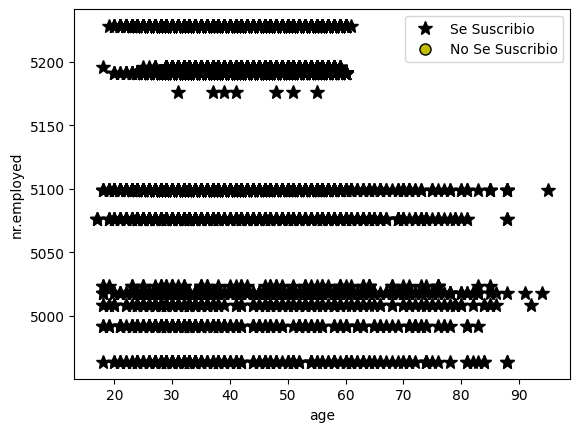

In [42]:
plotData(X_trainNp, y_trainNp)
# adiciona etiquetas para los ejes
pyplot.xlabel('age')
pyplot.ylabel('nr.employed')
pyplot.legend(['Se Suscribio', 'No Se Suscribio'])
pass

Definimos la funcion sigmoide, esta funcion nos permite convertir los numeros en valores entre 0 y 1 y asi poder modelar probabilidades

In [43]:
def sigmoid(z):
    # Calcula la sigmoide de una entrada z
    # convierte la intrada a un arreglo numpy
    z = np.array(z)

    g = np.zeros(z.shape)

    g = 1 / (1 + np.exp(-z))

    return g

Concatenamos la columna de unos a X

In [47]:
# Configurar la matriz adecuadamente, y agregar una columna de unos que corresponde al termino de intercepción.
m = X_trainNp.shape[0]
print(m)
# Agraga el termino de intercepción a A
X_trainNp = np.concatenate([np.ones((m, 1)), X_trainNp], axis=1)

32950


Definimos la funcion para calcular el costo

In [48]:
def calcularCosto(theta, X, y):
    # Inicializar algunos valores utiles
    m = y.size  # numero de ejemplos de entrenamiento

    J = 0
    h = sigmoid(X.dot(theta.T))
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))

    return J

Definimos la funcion que calcula el costo.

La función de costo J para la regresión logística con regularización se define como:

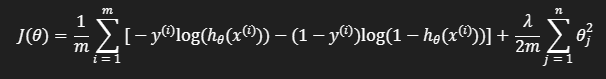


In [ ]:
def calcularCostoRegularizado(theta, X, y, lambda_):
    # Inicializar algunos valores utiles
    m = y.size  # numero de ejemplos de entrenamiento

    h = sigmoid(X.dot(theta.T))
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))

    # Añadir el término de regularización
    J += (lambda_ / (2 * m)) * np.sum(np.square(theta[1:]))

    return J


Definimos la funcion del descenso por el Gradiente para encontrar los parametros theta que minimizan el costo de las predicciones

In [49]:
def descensoGradiente(theta, X, y, alpha, num_iters):
    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()
    J_history = []

    for i in range(num_iters):
        h = sigmoid(X.dot(theta.T))
        theta = theta - (alpha / m) * (h - y).dot(X)

        J_history.append(calcularCosto(theta, X, y))
    return theta, J_history

Definimos la funcion del descenso por el Gradiente para encontrar los parametros theta que minimizan el costo de las predicciones

El gradiente de la funcion de costo con regularizacion se define como:

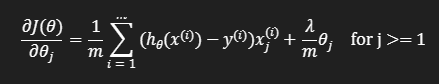

In [ ]:
def descensoGradienteRegularizado(theta, X, y, alpha, num_iters, lambda_):
    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()
    J_history = []

    for i in range(num_iters):
        h = sigmoid(X.dot(theta.T))
        theta = theta * (1 - alpha * (lambda_ / m)) - (alpha / m) * (h - y).dot(X)

        J_history.append(calcularCostoRegularizado(theta, X, y, lambda_))
    return theta, J_history


Preparamos el conjunto para la prueba de prediccion

In [50]:
X_testNp = X_test.values
y_testNp= y_test.values
m = X_testNp.shape[0]
X_testNp = np.concatenate([np.ones((m, 1)), X_testNp], axis=1)

LLamamos a la funcion del descenso por el gradiente con un total de 30000 iteraciones y probamos el modelo con el 20% del dataset. Tambien graficamos la convergencia del costo

[0.6931470777154671, 0.693146974871003, 0.6931468720265537, 0.6931467691821179, 0.6931466663376965, 0.6931465634932894, 0.693146460648896, 0.6931463578045174, 0.6931462549601531, 0.6931461521158024, 0.6931460492714665, 0.6931459464271448, 0.6931458435828375, 0.6931457407385435, 0.6931456378942641, 0.6931455350499993, 0.6931454322057488, 0.6931453293615119, 0.6931452265172897, 0.6931451236730812, 0.6931450208288876, 0.6931449179847078, 0.693144815140542, 0.6931447122963911, 0.6931446094522536, 0.693144506608131, 0.6931444037640223, 0.6931443009199278, 0.6931441980758477, 0.6931440952317816, 0.69314399238773, 0.6931438895436923, 0.6931437866996691, 0.6931436838556598, 0.6931435810116651, 0.6931434781676844, 0.6931433753237178, 0.6931432724797654, 0.6931431696358277, 0.6931430667919034, 0.6931429639479939, 0.6931428611040987, 0.6931427582602171, 0.6931426554163501, 0.6931425525724975, 0.6931424497286589, 0.6931423468848347, 0.6931422440410248, 0.6931421411972285, 0.6931420383534472, 0.693

'predicciones = []\nfor X_array in X_testNp:\n    aprueba = sigmoid(np.dot(X_array, theta))\n    predicciones.append(aprueba)\n\nprint(\'Las predicciones para todas las filas en X_testNp son:\')\nfor i, pred in enumerate(predicciones):\n    print(\'Fila {}: has the client subscribed a term deposit? (binary: "yes","no") (usando el descenso por el gradiente): {:.0f}\'.format(i, pred))'

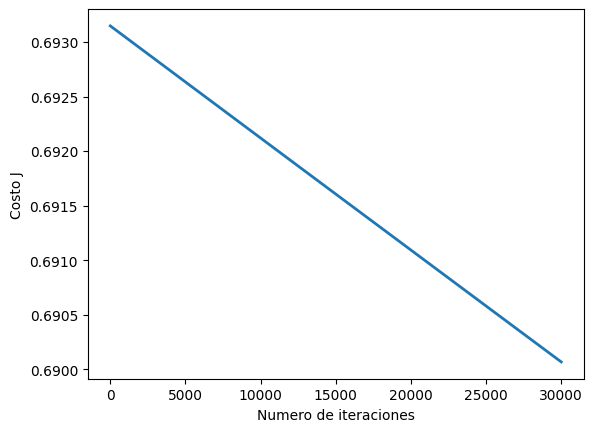

In [67]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.00000000000001
num_iters = 30000
#lambda_ = 0.1
# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(16)
theta, J_history = descensoGradiente(theta, X_trainNp, y_trainNp, alpha, num_iters)
print(J_history)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

#se realiza las predicciones
'''predicciones = []
for X_array in X_testNp:
    aprueba = sigmoid(np.dot(X_array, theta))
    predicciones.append(aprueba)

print('Las predicciones para todas las filas en X_testNp son:')
for i, pred in enumerate(predicciones):
    print('Fila {}: has the client subscribed a term deposit? (binary: "yes","no") (usando el descenso por el gradiente): {:.0f}'.format(i, pred))'''


Definimos la funcion predict que toma los parametros del modelo y las X's y devuelve las predicciones

In [61]:
def predict(theta, X):

    m = X.shape[0] # Numero de ejemplos de entrenamiento

    p = np.zeros(m)

    p = np.round(sigmoid(X.dot(theta.T)))
    return p

In [68]:
# Compute accuracy on our training set
p = predict(theta, X_testNp)
print('Precisión de entrenamiento: {:.2f} %'.format(np.mean(p == y_testNp) * 100))

Precisión de entrenamiento: 88.54 %
